# Climate mitigation tool using Recurrent Neural Network (LSTM)

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

# S1 - Analysing Dataset

In [3]:
# Analysing the encoding of the file
import chardet

with open("Datasets/Beutenberg_2023_7-12.csv", "rb") as file:
    result = chardet.detect(file.read(10000))
    print(result['encoding'])

ISO-8859-1


In [4]:
# data - Beutenberg Campus, Germany (july 2023 - november 2024)

data1 = pd.read_csv("Datasets/Beutenberg_2023_7-12.csv", encoding = 'ISO-8859-1') # july 2023 - december 2023
data2 = pd.read_csv("Datasets/Beutenberg_2024_1-11.csv", encoding = 'ISO-8859-1') # january 2024 - november 2024

data = pd.concat([data1, data2]) # Merging both the datasets
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.07.2023 00:10:00,984.99,15.21,289.61,15.19,99.9,17.31,17.29,0.02,10.99,...,1.02,1.32,208.1,0.0,0.0,0.0,0.0,0.0,27.10,450.3
1,01.07.2023 00:20:00,985.00,15.03,289.43,15.03,100.0,17.11,17.11,0.00,10.88,...,0.47,1.11,219.9,0.0,0.0,0.0,0.0,0.0,27.05,451.0
2,01.07.2023 00:30:00,984.98,14.86,289.26,14.64,98.6,16.92,16.69,0.24,10.61,...,1.06,1.77,226.7,0.0,0.0,0.0,0.0,0.0,26.97,439.4
3,01.07.2023 00:40:00,984.91,14.91,289.32,14.47,97.2,16.98,16.50,0.48,10.49,...,1.29,1.89,242.1,0.0,0.0,0.0,0.0,0.0,26.87,438.2
4,01.07.2023 00:50:00,984.92,14.77,289.17,14.46,98.0,16.83,16.49,0.34,10.48,...,1.45,2.06,238.6,0.0,0.0,0.0,0.0,0.0,26.73,440.0


In [4]:
# R x C of the dataset
data.shape

(72946, 22)

In [5]:
# Features + Labels
data.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)',
       'PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)'],
      dtype='object')

In [6]:
data.isnull().sum()

Date Time               0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
rain (mm)               0
raining (s)             0
SWDR (W/m²)             0
PAR (µmol/m²/s)         0
max. PAR (µmol/m²/s)    0
Tlog (degC)             0
CO2 (ppm)               0
dtype: int64

In [7]:
data1.shape

(26639, 22)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

all = ['T (degC)', 'Tpot (K)', 'p (mbar)', 'Tdew (degC)','rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)','H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)','wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)','PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)']
features = ['p (mbar)', 'Tdew (degC)','rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)','H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)','wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m²)','PAR (µmol/m²/s)', 'max. PAR (µmol/m²/s)', 'Tlog (degC)', 'CO2 (ppm)']
df = data
# df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')

# Encoding the labels (crop)
# label_encoder = LabelEncoder()
# df['Tpot (K)'] = label_encoder.fit_transform(df['Tpot (K)'])

# Scale only numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[all])

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=all)

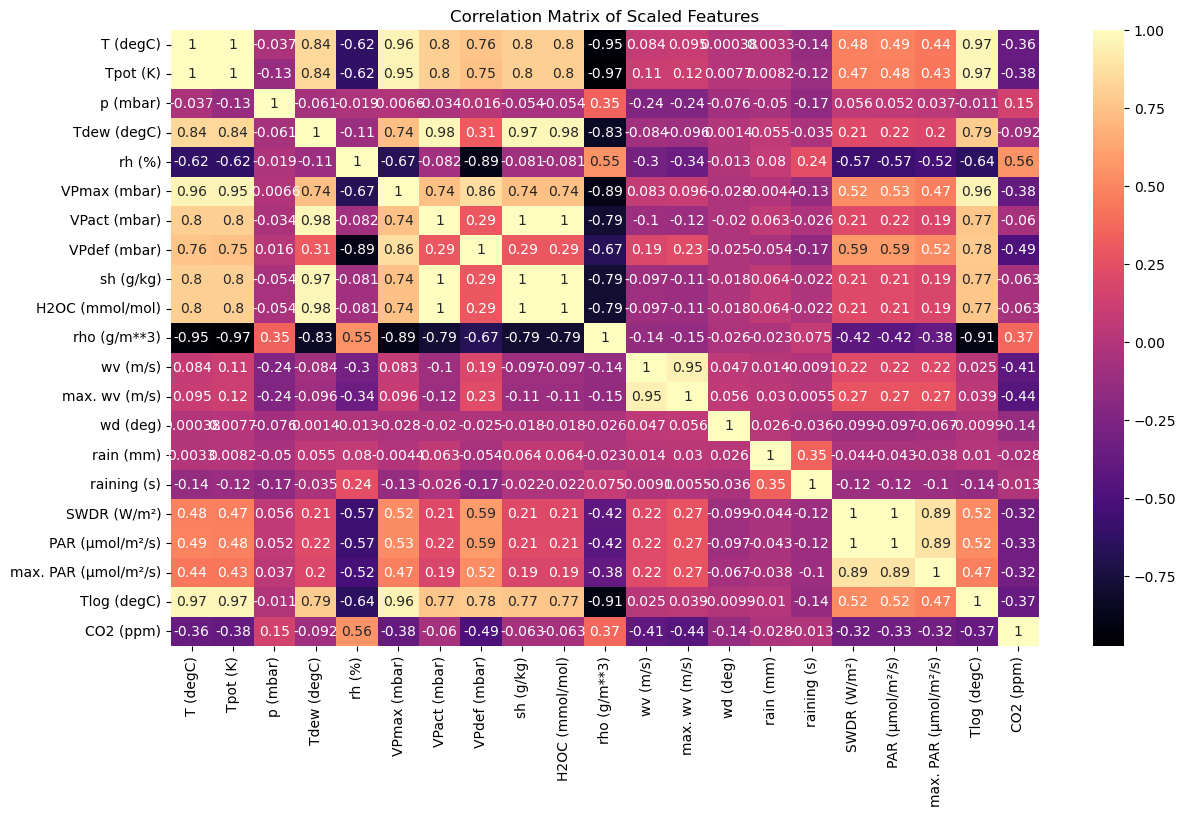

In [9]:
# Computing and visualising the correlation matrix

plt.figure(figsize=(14, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='magma')
plt.title('Correlation Matrix of Scaled Features')
plt.show()

In [10]:
# Creating dataframes of features

time = data['Date Time']
temperature = data['T (degC)']
temperature_pot = data['Tpot (K)']
pressure = data['p (mbar)']
temperature_dew = data['Tdew (degC)']
relative_humidity = data['rh (%)']
vapor_pressure_max = data['VPmax (mbar)']
vapor_pressure_actual = data['VPact (mbar)']
vapor_pressure_deficit = data['VPdef (mbar)']
specific_humidity = data['sh (g/kg)']
h2o_concentration = data['H2OC (mmol/mol)']
density = data['rho (g/m**3)']
wind_speed = data['wv (m/s)']
max_wind_speed = data['max. wv (m/s)']
wind_direction = data['wd (deg)']
rain_mm = data['rain (mm)']
raining_seconds = data['raining (s)']
solar_radiation = data['SWDR (W/m²)']
photosynthetically_active_radiation = data['PAR (µmol/m²/s)']
max_par = data['max. PAR (µmol/m²/s)']
temperature_log = data['Tlog (degC)']
co2_concentration = data['CO2 (ppm)']

# S2 - Data Preprocessing

In [11]:
# Creating function for normalization

def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

In [12]:
features = pd.concat([temperature, temperature_pot, pressure, temperature_dew, relative_humidity, vapor_pressure_max, vapor_pressure_actual, vapor_pressure_deficit, specific_humidity, h2o_concentration, density, wind_speed, max_wind_speed, wind_direction, rain_mm, raining_seconds, solar_radiation, photosynthetically_active_radiation, max_par, temperature_log, co2_concentration], axis=1)
features.index = time
features.head(2)

,T (degC),Tpot (K),p (mbar),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
01.07.2023 00:10:00,15.21,289.61,984.99,15.19,99.9,17.31,17.29,0.02,10.99,17.56,...,1.02,1.32,208.1,0.0,0.0,0.0,0.0,0.0,27.10,450.3
01.07.2023 00:20:00,15.03,289.43,985.00,15.03,100.0,17.11,17.11,0.00,10.88,17.37,...,0.47,1.11,219.9,0.0,0.0,0.0,0.0,0.0,27.05,451.0


In [13]:
# Normalizing the data

features = normalize(features.values)
features = pd.DataFrame(features)
features.head(2)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.300937,0.327359,-0.297255,1.127229,1.208795,0.086249,1.210460,-0.790873,1.220191,1.222086,...,-0.764995,-0.968020,0.288071,-0.09199,-0.27016,-0.618892,-0.624086,-0.577135,0.467293,0.738858
1,0.277700,0.304379,-0.296171,1.100013,1.214307,0.062292,1.169903,-0.794273,1.181225,1.179807,...,-1.120583,-1.056569,0.427335,-0.09199,-0.27016,-0.618892,-0.624086,-0.577135,0.461239,0.773212


In [14]:
# Training Testing split of data

training_size = int ( 0.8 * features.shape[0])  
train_data = features.loc[0 : training_size - 1]
val_data = features.loc[training_size:]

# S3 - Data Training

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

2024-11-18 15:41:06.556018: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# 1 hr - 6 timestamps
# 1 day - 24 hrs
# 1 month - 30 days
# Training of 1 months data - 30x24x6 = 4320
# Predicting the data of next 6 days - 6x24x6 = 864

start = 4320 + 864
end = start + training_size

x_train = train_data.values
y_train = features.iloc[start:end][[0]]

sequence_length = int(4320 / 144)

In [17]:

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    sampling_rate=24,
    batch_size=256,
)

2024-11-18 15:41:07.921274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-18 15:41:07.921356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
# Validation Dataset

x_val_end = len(val_data) - start

label_start = training_size + start

x_val = val_data.iloc[:x_val_end][[i for i in range(21)]].values
y_val = features.iloc[label_start:][[0]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=24,
    batch_size=256,
)

print(val_data.shape)

print("x_val_end:", x_val_end)

x_val_end = len(val_data) - start

print(val_data.iloc[:x_val_end][[i for i in range(6)]].shape)

print(features.iloc[label_start:][[0]].shape)

print("Total required:", end)
print("Available val_data:", len(val_data))
print("Available features:", len(features))

# S4 - Creating LSTM Climate predicting Model

In [34]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00007), loss="mse")
model.summary()

Model: "Weather_forcaster"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 21)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                6912      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,945
Trainable params: 6,945
Non-trainable params: 0
_________________________________________________________________


2024-11-18 16:37:40.989901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2024-11-18 16:37:40.990666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [58356,1]
	 [[{{node Placeholder/_20}}]]
2024-11-18 16:37:41.114178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype 

# S5 - Training the LSTM model

In [35]:
history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_val
)

Epoch 1/50


2024-11-18 16:37:43.435209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-18 16:37:43.436099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-18 16:37:43.436929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

226/226 [==============================] - ETA: 0s - loss: 1.0140

2024-11-18 16:37:46.755237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-18 16:37:46.756008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-18 16:37:46.756768: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

226/226 [==============================] - 4s 13ms/step - loss: 1.0140 - val_loss: 0.5263
Epoch 2/50
226/226 [==============================] - 3s 12ms/step - loss: 0.7232 - val_loss: 0.6312
Epoch 3/50
226/226 [==============================] - 3s 13ms/step - loss: 0.6465 - val_loss: 0.6645
Epoch 4/50
226/226 [==============================] - 3s 13ms/step - loss: 0.6127 - val_loss: 0.6558
Epoch 5/50
226/226 [==============================] - 3s 12ms/step - loss: 0.5866 - val_loss: 0.6349
Epoch 6/50
226/226 [==============================] - 3s 13ms/step - loss: 0.5628 - val_loss: 0.6122
Epoch 7/50
226/226 [==============================] - 3s 13ms/step - loss: 0.5404 - val_loss: 0.5900
Epoch 8/50
226/226 [==============================] - 3s 12ms/step - loss: 0.5189 - val_loss: 0.5692
Epoch 9/50
226/226 [==============================] - 3s 12ms/step - loss: 0.4982 - val_loss: 0.5498
Epoch 10/50
226/226 [==============================] - 3s 12ms/step - loss: 0.4782 - val_loss: 0.5320


# S6 - Evaluating the model

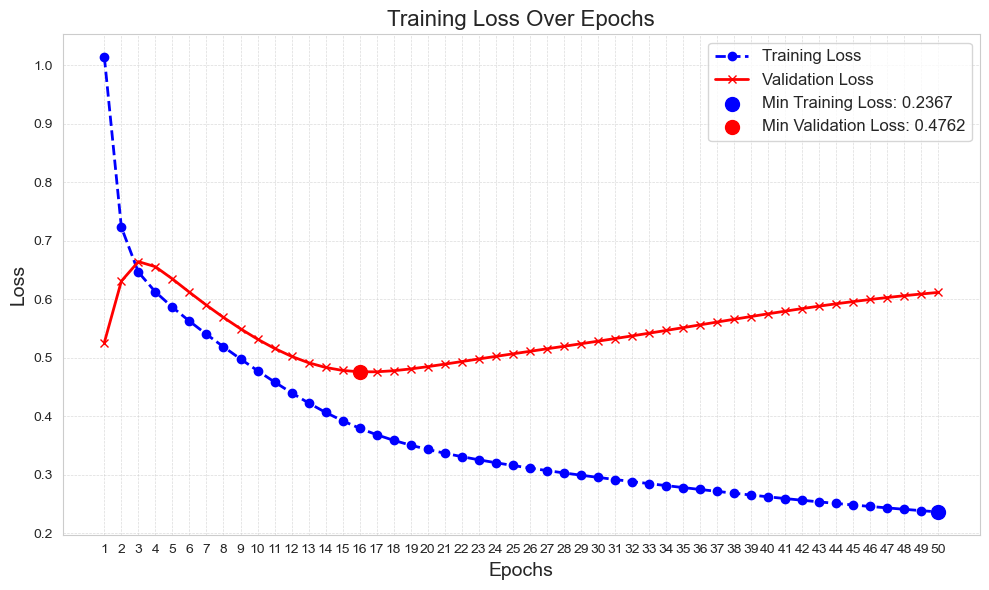

In [36]:

val_loss = history.history.get("val_loss", None)
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

plt.plot(epochs, loss, color="b", linestyle="--", linewidth=2, marker="o", label="Training Loss")

if val_loss:
    plt.plot(epochs, val_loss, color="r", linestyle="-", linewidth=2, marker="x", label="Validation Loss")

min_loss_idx = loss.index(min(loss))
plt.scatter(min_loss_idx + 1, min(loss), color="b", s=100, label=f"Min Training Loss: {min(loss):.4f}")
if val_loss:
    min_val_loss_idx = val_loss.index(min(val_loss))
    plt.scatter(min_val_loss_idx + 1, min(val_loss), color="r", s=100, label=f"Min Validation Loss: {min(val_loss):.4f}")

plt.title("Training Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.legend(fontsize=12, loc="upper right")

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.xticks(range(1, len(epochs) + 1))  # Show every epoch

plt.tight_layout()
plt.show()

# S7 - Visualizing Predicted and True

2024-11-18 16:40:52.784149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [9406,21]
	 [[{{node Placeholder/_0}}]]
2024-11-18 16:40:52.784714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [8687]
	 [[{{node Placeholder/_28}}]]


8/8 [==============================] - 0s 4ms/step


2024-11-18 16:40:52.996297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-18 16:40:52.997261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-18 16:40:52.997818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

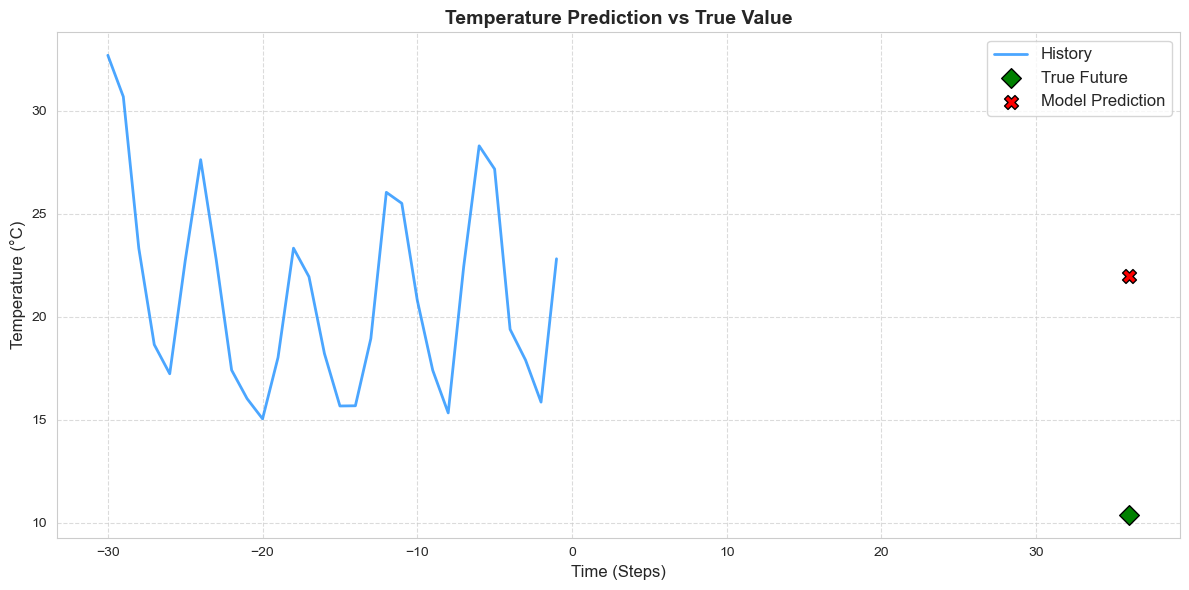

In [37]:
# Plotting history and predicted, true value

temp_mean = temperature.mean(axis=0)
temp_std = temperature.std(axis=0)

for x, y in dataset_val.skip(12):
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean
    time_steps = list(range(-(history_data.shape[0]), 0))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps, history_data, label="History", color="dodgerblue", lw=2, alpha=0.8)
    plt.scatter(36, true_value, color="green", label="True Future", s=100, edgecolor="black", zorder=5, marker="D")
    plt.scatter(36, prediction, color="red", label="Model Prediction", s=100, edgecolor="black", zorder=5, marker="X")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.title("Temperature Prediction vs True Value", fontsize=14, fontweight="bold")
    plt.xlabel("Time (Steps)", fontsize=12)
    plt.ylabel("Temperature (°C)", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()
    
    break

# S8 - Saving the gradients/parameters for prediction tool

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pickle

# Load the dataset
# df = pd.read_csv('weather_data.csv')  # Replace with your dataset
# Assume 'Temperature' is the column to predict
data1 = data['T (degC)'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Prepare the data for LSTM
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(x), np.array(y)

sequence_length = 30  # Sliding window of 30 days
x, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

# Save the trained model
model.save('model.h5')

print("Model and scaler saved successfully!")

2024-11-18 17:08:33.385557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-18 17:08:33.385784: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-11-18 17:08:33.608101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-18 17:08:33.608640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] 

Epoch 1/20


2024-11-18 17:08:33.691146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-18 17:08:33.691714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-18 17:08:33.692421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1823/1823 [==============================] - ETA: 0s - loss: 8.4386e-04

2024-11-18 17:09:02.601140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-18 17:09:02.601782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-18 17:09:02.602189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1823/1823 [==============================] - 31s 16ms/step - loss: 8.4386e-04 - val_loss: 1.3553e-04
Epoch 2/20
1823/1823 [==============================] - 28s 16ms/step - loss: 1.0174e-04 - val_loss: 1.0424e-04
Epoch 3/20
1823/1823 [==============================] - 28s 15ms/step - loss: 4.7151e-05 - val_loss: 5.5452e-05
Epoch 4/20
1823/1823 [==============================] - 28s 15ms/step - loss: 3.7286e-05 - val_loss: 3.6375e-05
Epoch 5/20
1823/1823 [==============================] - 29s 16ms/step - loss: 3.2453e-05 - val_loss: 1.7388e-05
Epoch 6/20
1823/1823 [==============================] - 29s 16ms/step - loss: 3.1343e-05 - val_loss: 1.7985e-05
Epoch 7/20
1823/1823 [==============================] - 29s 16ms/step - loss: 3.1560e-05 - val_loss: 3.9973e-05
Epoch 8/20
1823/1823 [==============================] - 29s 16ms/step - loss: 3.1187e-05 - val_loss: 1.7180e-05
Epoch 9/20
1823/1823 [==============================] - 29s 16ms/step - loss: 2.9231e-05 - val_loss: 1.5943e-05
Epo

                                    ~end~                                          